In [0]:
import pandas as pd
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 1. The data

## data description
Based on aspects of building location and construction, your goal is to predict the level of damage to buildings caused by the 2015 Gorkha earthquake in Nepal.

This is an intermediate-level practice competition.

The data was collected through surveys by the **Central Bureau of Statistics** that work under the **National Planning Commission Secretariat of Nepal**. This survey is one of the **largest post-disaster datasets ever collected**, containing valuable information on earthquake impacts, household conditions, and socio-economic-demographic statistics.

## problem description

We're trying to predict the ordinal variable `damage_grade`, which represents a level of damage to the building that was hit by the earthquake. There are 3 grades of the damage:

* 1. represents low damage
* 2. represents a medium amount of damage
* 3. represents almost complete destruction

## features 
The dataset mainly consists of **information on the buildings' structure and their legal ownership**. Each row in the dataset represents a specific building in the region that was hit by Gorkha earthquake.

There are 39 columns in this dataset, where the `building_id column` is a unique and random identifier. The remaining 38 features are described in the section below. Categorical variables have been obfuscated random lowercase ascii characters. The appearance of the same character in distinct columns does not imply the same original value.

Description
* **geo_level_1_id**, **geo_level_2_id**, **geo_level_3_id** (type: int): geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.
* **count_floors_pre_eq** (type: int): number of floors in the building before the earthquake.
* **age** (type: int): age of the building in years.
* **area_percentage** (type: int): normalized area of the building footprint.
* **height_percentage** (type: int): normalized height of the building footprint.
* **land_surface_condition** (type: categorical): surface condition of the land where the building was built. Possible * **values: n, o, t.
* **foundation_type** (type: categorical): type of foundation used while building. Possible values: h, i, r, u, w.
* **roof_type** (type: categorical): type of roof used while building. Possible values: n, q, x.
* **ground_floor_type** (type: categorical): type of the ground floor. Possible values: f, m, v, x, z.
* **other_floor_type **(type: categorical): type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.
* **position** (type: categorical): position of the building. Possible values: j, o, s, t.
* **plan_configuration** (type: categorical): building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.
* **has_superstructure_adobe_mud** (type: binary): flag variable that indicates if the superstructure was made of Adobe/Mud.
* **has_superstructure_mud_mortar_stone** (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Stone.
* **has_superstructure_stone_flag** (type: binary): flag variable that indicates if the superstructure was made of Stone.
* **has_superstructure_cement_mortar_stone** (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Stone.
* **has_superstructure_mud_mortar_brick** (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Brick.
* **has_superstructure_cement_mortar_brick** (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Brick.
* **has_superstructure_timber** (type: binary): flag variable that indicates if the superstructure was made of Timber.
* **has_superstructure_bamboo** (type: binary): flag variable that indicates if the superstructure was made of Bamboo.
* **has_superstructure_rc_non_engineered** (type: binary): flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.
* **has_superstructure_rc_engineered** (type: binary): flag variable that indicates if the superstructure was made of engineered reinforced concrete.
* **has_superstructure_other** (type: binary): flag variable that indicates if the superstructure was made of any other material.
* **legal_ownership_status** (type: categorical): legal ownership status of the land where building was built. Possible values: a, r, v, w.
* **count_families** (type: int): number of families that live in the building.
* **has_secondary_use** (type: binary): flag variable that indicates if the building was used for any secondary purpose.
* **has_secondary_use_agriculture** (type: binary): flag variable that indicates if the building was used for agricultural purposes.
* **has_secondary_use_hotel** (type: binary): flag variable that indicates if the building was used as a hotel.
* **has_secondary_use_rental** (type: binary): flag variable that indicates if the building was used for rental purposes.
* **has_secondary_use_institution** (type: binary): flag variable that indicates if the building was used as a location of any institution.
* **has_secondary_use_school** (type: binary): flag variable that indicates if the building was used as a school.
* **has_secondary_use_industry** (type: binary): flag variable that indicates if the building was used for industrial purposes.
* **has_secondary_use_health_post** (type: binary): flag variable that indicates if the building was used as a health post.
* **has_secondary_use_gov_office** (type: binary): flag variable that indicates if the building was used fas a government office.
* **has_secondary_use_use_police** (type: binary): flag variable that indicates if the building was used as a police station.
* **has_secondary_use_other** (type: binary): flag variable that indicates if the building was secondarily used for other purposes.

## performance metric [link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) (f1_score with average = micro)
We are predicting the level of damage from 1 to 3. The level of damage is an ordinal variable meaning that ordering is important. This can be viewed as a classification or an ordinal regression problem. (Ordinal regression is sometimes described as an problem somewhere in between classification and regression.)

To measure the performance of our algorithms, we'll use the **F1 score which balances the precision and recall of a classifier**. Traditionally, the F1 score is used to evaluate performance on a binary classifier, but since we have three possible labels we will use a variant called the micro averaged F1 score.

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/frandiego/data/master/nepal_earthquake_damage.csv')

In [0]:
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


# 2. Separate columns names. 
### label, id_columns and features

In [0]:
label = ['damage_grade']
id_columns = [i for i in df.columns if i.endswith('_id')]
features = [i for i in df.columns if i not in id_columns + label]

# 3 Split

## 3.1. Split in `df_train` and `df_test` $$Exercise$$

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
df_train, df_test = train_test_split(df[features+label],test_size=0.25, random_state = 101)

## 3.2. Check how balanced is `damage_grade` in both train and test $$Exercise$$

In [0]:
df_train[label[0]].value_counts(normalize=True)

2    0.568207
3    0.335876
1    0.095917
Name: damage_grade, dtype: float64

In [0]:
df_test[label[0]].value_counts(normalize=True)

2    0.571027
3    0.331092
1    0.097880
Name: damage_grade, dtype: float64

# 4. EDA

## 4.1 Cardinality Ratio. Create the cardinality ratio dataframe and plot it using a barplot
$$Exercise$$

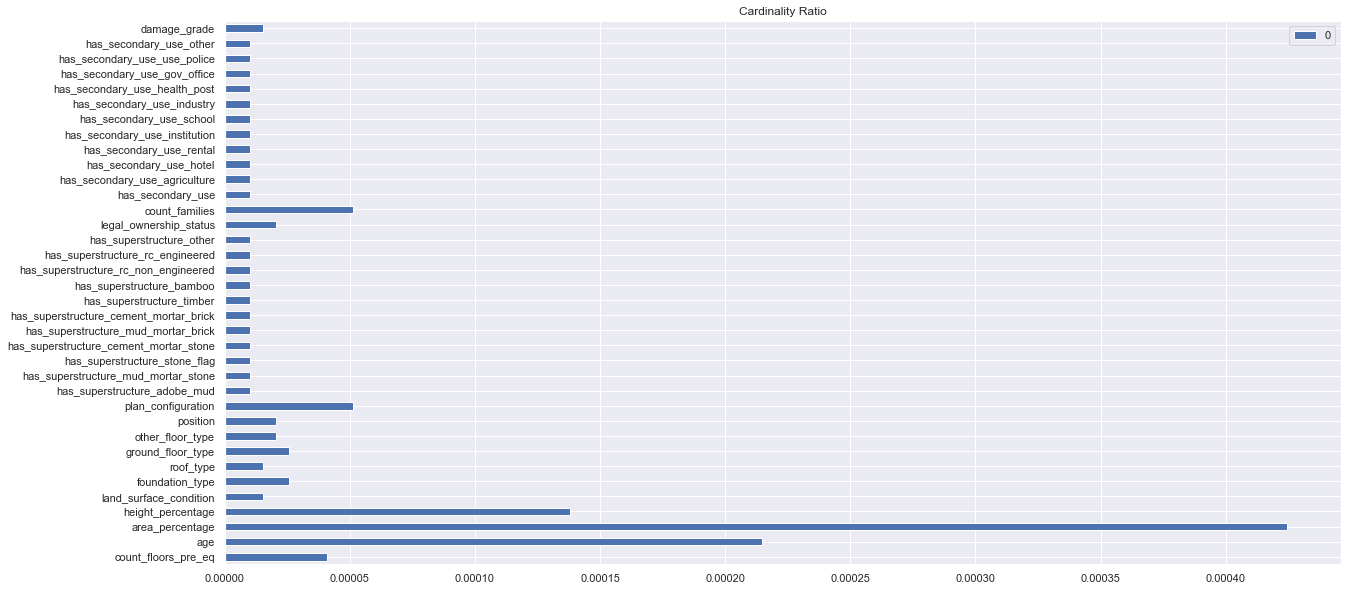

In [0]:
pd.DataFrame(df_train.nunique()/len(df_train)).plot.barh(title='Cardinality Ratio')

## 4.2. Corrplot (nothing to see because we have categorical data)

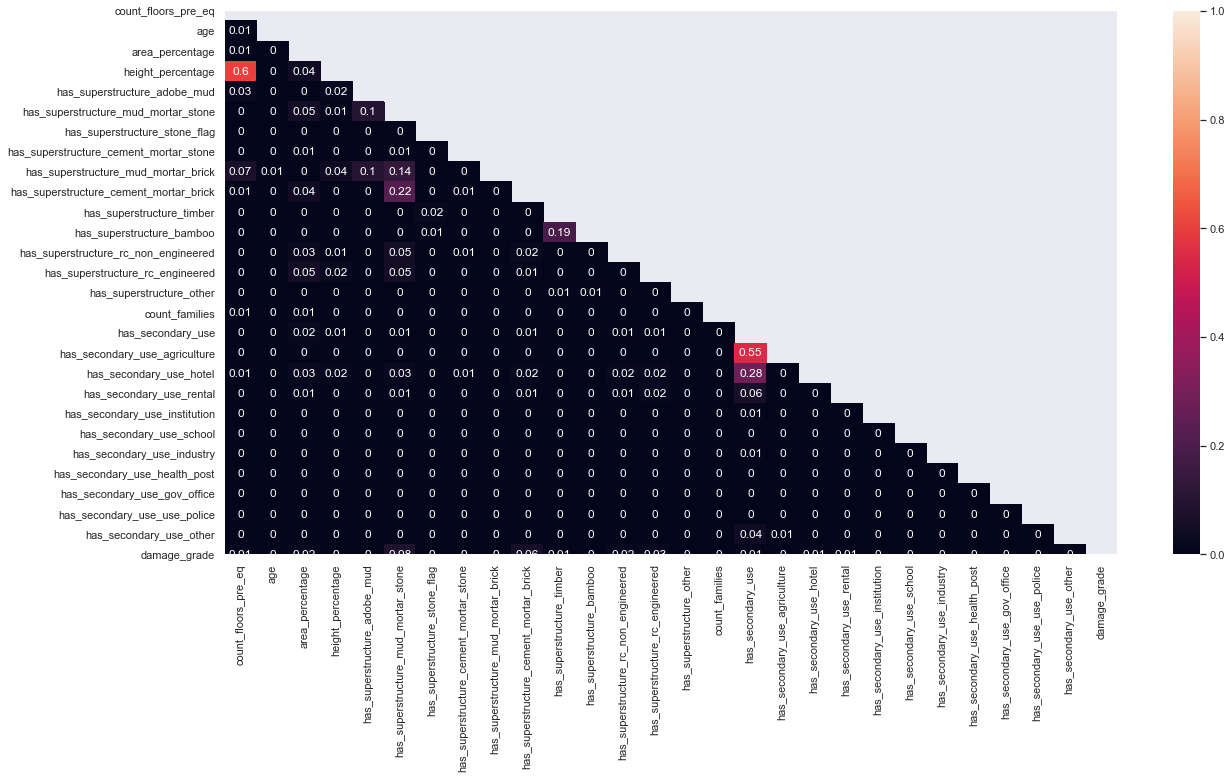

In [0]:
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap((df_train.corr()**2).round(2), annot=True, mask=np.triu(df_train.corr()))

## 4.3. Let's find a way to explore categorical variables

In [0]:
df_train.melt('damage_grade')

,damage_grade,variable,value
0,2,count_floors_pre_eq,1
1,2,count_floors_pre_eq,4
2,2,count_floors_pre_eq,1
3,3,count_floors_pre_eq,2
4,2,count_floors_pre_eq,3
...,...,...,...
6840745,1,has_secondary_use_other,0
6840746,2,has_secondary_use_other,0
6840747,2,has_secondary_use_other,0
6840748,3,has_secondary_use_other,0


In [0]:
df_train.melt('damage_grade').groupby(['variable','value']).agg({'damage_grade':'mean'}).reset_index()

,variable,value,damage_grade
0,age,0,1.963556
1,age,5,2.105842
2,age,10,2.199329
3,age,15,2.264645
4,age,20,2.302563
...,...,...,...
247,position,s,2.230909
248,position,t,2.309900
249,roof_type,n,2.271239
250,roof_type,q,2.321154


In [0]:
df_std = df_train.melt('damage_grade').groupby(['variable','value']).agg({'damage_grade':'mean'}).reset_index()
df_std = df_std.groupby('variable').agg({'damage_grade':'std'}).reset_index()
df_std.head()

,variable,damage_grade
0,age,0.207440
1,area_percentage,0.267076
2,count_families,0.285967
3,count_floors_pre_eq,0.179971
4,foundation_type,0.331470


In [0]:
df_std.rename(columns = {'damage_grade':'damage_grade_mean_std'},inplace=True)
df_std.sort_values('damage_grade_mean_std',ascending=False,inplace=True)

In [0]:
px.bar(df_std,'variable','damage_grade_mean_std')

# 5. Map Encoder

In [0]:
df_train.select_dtypes('object').head()

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
146751,t,r,n,f,j,s,d,v
131503,t,r,q,f,q,o,d,v
185790,t,r,n,f,j,s,d,v
45775,t,r,n,f,q,s,d,r
232163,t,r,n,x,x,j,d,v


## 5.1 Let's study theese functions

In [0]:
import pandas as pd
from copy import deepcopy

## map encoder
def map_encoder_categorical(x):
    set_ = sorted(set(x))
    range_ = list(range(1,len(set_)+1))
    return dict(zip(set_,range_))

def map_encoder_fit(df,categorical_features):
    return {i:map_encoder_categorical(df[i]) for i in categorical_features}

def map_encoder_transform(df,map_encoder):
    df_ = deepcopy(df) 
    for i in map_encoder.keys():
        map_encoder_variable = map_encoder[i]
        fill_ = int(max(map_encoder_variable.values()) + 1)
        df_[i] = df_[i].map(map_encoder_variable).fillna(fill_).astype(int)
    return df_


In [0]:
map_encoder = map_encoder_fit(df_train,df_train.select_dtypes('object').columns)
map_encoder

{'land_surface_condition': {'n': 1, 'o': 2, 't': 3},
 'foundation_type': {'h': 1, 'i': 2, 'r': 3, 'u': 4, 'w': 5},
 'roof_type': {'n': 1, 'q': 2, 'x': 3},
 'ground_floor_type': {'f': 1, 'm': 2, 'v': 3, 'x': 4, 'z': 5},
 'other_floor_type': {'j': 1, 'q': 2, 's': 3, 'x': 4},
 'position': {'j': 1, 'o': 2, 's': 3, 't': 4},
 'plan_configuration': {'a': 1,
  'c': 2,
  'd': 3,
  'f': 4,
  'm': 5,
  'n': 6,
  'o': 7,
  'q': 8,
  's': 9,
  'u': 10},
 'legal_ownership_status': {'a': 1, 'r': 2, 'v': 3, 'w': 4}}

In [0]:
df_train.head() # we keep having strings (we have not transform the data)

,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
146751,1,5,3,2,t,r,n,f,j,s,...,0,0,0,0,0,0,0,0,0,2
131503,4,85,16,9,t,r,q,f,q,o,...,0,0,0,0,0,0,0,0,0,2
185790,1,15,9,2,t,r,n,f,j,s,...,0,0,0,0,0,0,0,0,0,2
45775,2,60,6,5,t,r,n,f,q,s,...,0,0,0,0,0,0,0,0,0,3
232163,3,45,4,8,t,r,n,x,x,j,...,0,0,0,0,0,0,0,0,0,2


In [0]:
df_train_transformed = map_encoder_transform(df_train,map_encoder)
df_train_transformed.head()

,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
146751,1,5,3,2,3,3,1,1,1,3,...,0,0,0,0,0,0,0,0,0,2
131503,4,85,16,9,3,3,2,1,2,2,...,0,0,0,0,0,0,0,0,0,2
185790,1,15,9,2,3,3,1,1,1,3,...,0,0,0,0,0,0,0,0,0,2
45775,2,60,6,5,3,3,1,1,2,3,...,0,0,0,0,0,0,0,0,0,3
232163,3,45,4,8,3,3,1,4,4,1,...,0,0,0,0,0,0,0,0,0,2


# 6. One Hot Encoder

## 6.1 Let's see the variable to one hot encode ( nunique >2 and <8)

In [0]:
df_nuniqe = df_train_transformed.nunique()

In [0]:
df_nuniqe[(df_nuniqe>2)&(df_nuniqe<8)]

land_surface_condition    3
foundation_type           5
roof_type                 3
ground_floor_type         5
other_floor_type          4
position                  4
legal_ownership_status    4
damage_grade              3
dtype: int64

In [0]:
onehot_column = list(df_nuniqe[(df_nuniqe>2)&(df_nuniqe<8)].index)
onehot_column = [i for i in onehot_column if i != label[0]]
onehot_column

['land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'legal_ownership_status']

## 6.2. Let's explore those functions

In [0]:
## onehot encoder
def onehot_encoder_fit(df,columns):
    dict_ = {}
    dict_['categorical_columns'] = columns
    dict_['output_columns'] = list(pd.get_dummies(data=df,columns=columns).columns)
    return dict_

def onehot_encoder_transform(df,onehot_encoder):
    df_ = deepcopy(df)
    df_ = pd.get_dummies(data=df_,columns=onehot_encoder['categorical_columns'])
    df_ = df_.loc[:,onehot_encoder['output_columns']].fillna(0)
    return df_

In [0]:
onehot_encoder = onehot_encoder_fit(df_train_transformed,onehot_column)
onehot_encoder

{'categorical_columns': ['land_surface_condition',
  'foundation_type',
  'roof_type',
  'ground_floor_type',
  'other_floor_type',
  'position',
  'legal_ownership_status'],
 'output_columns': ['count_floors_pre_eq',
  'age',
  'area_percentage',
  'height_percentage',
  'plan_configuration',
  'has_superstructure_adobe_mud',
  'has_superstructure_mud_mortar_stone',
  'has_superstructure_stone_flag',
  'has_superstructure_cement_mortar_stone',
  'has_superstructure_mud_mortar_brick',
  'has_superstructure_cement_mortar_brick',
  'has_superstructure_timber',
  'has_superstructure_bamboo',
  'has_superstructure_rc_non_engineered',
  'has_superstructure_rc_engineered',
  'has_superstructure_other',
  'count_families',
  'has_secondary_use',
  'has_secondary_use_agriculture',
  'has_secondary_use_hotel',
  'has_secondary_use_rental',
  'has_secondary_use_institution',
  'has_secondary_use_school',
  'has_secondary_use_industry',
  'has_secondary_use_health_post',
  'has_secondary_use_gov_

In [0]:
df_train_transformed = onehot_encoder_transform(df_train_transformed,onehot_encoder)
df_train_transformed.head()

,count_floors_pre_eq,age,area_percentage,height_percentage,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,...,other_floor_type_3,other_floor_type_4,position_1,position_2,position_3,position_4,legal_ownership_status_1,legal_ownership_status_2,legal_ownership_status_3,legal_ownership_status_4
146751,1,5,3,2,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
131503,4,85,16,9,3,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
185790,1,15,9,2,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
45775,2,60,6,5,3,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
232163,3,45,4,8,3,1,0,0,0,1,...,0,1,1,0,0,0,0,0,1,0


# 7. Create a function that takes a `map_encoder` , a `onehot_encoder` and the `label` and  return X and y from a dataset $$Exercise$$

In [0]:
def transform(df,map_encoder,onehotencoder,label):
    # write your function

In [0]:
def transform(df,map_encoder,onehot_encoder,label):
    df_ = map_encoder_transform(df,map_encoder)
    df_ = onehot_encoder_transform(df_,onehot_encoder)
    features = [i for i in df_.columns if i != label]
    return (df_[features],df_[label])

In [0]:
X_train,y_train = transform(df_train,map_encoder,onehot_encoder,'damage_grade')

In [0]:
X_test,y_test = transform(df_test,map_encoder,onehot_encoder,'damage_grade')

## 7.1 Aply this function to df_train and df_test $$Exercise$$

# 8. Install XGboost fit , predict an evaluate a `XGBClassifier`  (metric f1 micro) $$Exercise$$

In [0]:
# !conda install -c conda-forge xgboost --yes
# !python3 -m pip install xgboost
# !pip install xgboost

In [0]:
from xgboost import XGBClassifier

In [0]:
classifier_xgboost = XGBClassifier()

In [0]:
%%time
classifier_xgboost.fit(X_train,y_train)

CPU times: user 1min 36s, sys: 147 ms, total: 1min 36s
Wall time: 1min 36s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgboost = classifier_xgboost.predict(X_test)

In [0]:
from sklearn.metrics import classification_report,f1_score

In [0]:
print(classification_report(y_test,y_pred_xgboost))
print("F1-micro:", f1_score(y_test,y_pred_xgboost,average='micro'))

              precision    recall  f1-score   support

           1       0.62      0.31      0.41      6377
           2       0.60      0.91      0.72     37203
           3       0.57      0.14      0.22     21571

    accuracy                           0.60     65151
   macro avg       0.60      0.45      0.45     65151
weighted avg       0.59      0.60      0.53     65151

F1-micro: 0.596445181194456


# 9. Install Lightgbm fit , predict and evaluate a `LGBMClassifier` $$Exercise$$


In [0]:
# !conda install -c conda-forge lightgbm --yes
# !python3 -m pip install lightgbm
# !pip install lightgbm

In [0]:
from lightgbm import LGBMClassifier

In [0]:
classifier_lgbm = LGBMClassifier()

In [0]:
%%time
classifier_lgbm.fit(X_train,y_train)

CPU times: user 24.6 s, sys: 407 ms, total: 25 s
Wall time: 2.34 s


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [0]:
y_pred_lgbm = classifier_lgbm.predict(X_test)

In [0]:
print(classification_report(y_test,y_pred_lgbm))
print("F1-micro:", f1_score(y_test,y_pred_lgbm,average='micro'))

              precision    recall  f1-score   support

           1       0.61      0.35      0.44      6377
           2       0.62      0.86      0.72     37203
           3       0.58      0.25      0.35     21571

    accuracy                           0.61     65151
   macro avg       0.60      0.49      0.50     65151
weighted avg       0.60      0.61      0.57     65151

F1-micro: 0.6094917959816426


# 9. Install Catboost fit , predict and evaluate `CatBoostClassifier`  $$Exercise$$

In [0]:
# !conda install -c conda-forge catboost --yes
# !python3 -m pip install catboost
# !pip install catboost

In [0]:
from catboost import CatBoostClassifier

In [0]:
classifier_cat = CatBoostClassifier(verbose=0)

In [0]:
%%time
classifier_cat.fit(X_train,y_train)

CPU times: user 5min 11s, sys: 12.3 s, total: 5min 23s
Wall time: 37.3 s


In [0]:
y_pred_cat = classifier_cat.predict(X_test)

In [0]:
print(classification_report(y_test,y_pred_cat))
print("F1-micro:", f1_score(y_test,y_pred_cat,average='micro'))

              precision    recall  f1-score   support

           1       0.62      0.35      0.44      6377
           2       0.62      0.86      0.72     37203
           3       0.58      0.26      0.36     21571

    accuracy                           0.61     65151
   macro avg       0.61      0.49      0.51     65151
weighted avg       0.61      0.61      0.57     65151

F1-micro: 0.6125462387377016


# 10. Import `HistGradientBoostingClassifier`  and make the same process $$Exercise$$

In [0]:
# since it's experimental we have to import this function first
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingClassifier

In [0]:
classifier_hgb = HistGradientBoostingClassifier()

In [0]:
%%time
classifier_hgb.fit(X_train,y_train)

CPU times: user 43.8 s, sys: 1.16 s, total: 45 s
Wall time: 4.19 s


HistGradientBoostingClassifier(l2_regularization=0.0, learning_rate=0.1,
                               loss='auto', max_bins=255, max_depth=None,
                               max_iter=100, max_leaf_nodes=31,
                               min_samples_leaf=20, n_iter_no_change=None,
                               random_state=None, scoring=None, tol=1e-07,
                               validation_fraction=0.1, verbose=0,
                               warm_start=False)

In [0]:
y_pred_hgb = classifier_hgb.predict(X_test)

In [0]:
print(classification_report(y_test,y_pred_hgb))
print("F1-micro:", f1_score(y_test,y_pred_hgb,average='micro'))

              precision    recall  f1-score   support

           1       0.61      0.36      0.45      6377
           2       0.62      0.85      0.72     37203
           3       0.57      0.28      0.37     21571

    accuracy                           0.61     65151
   macro avg       0.60      0.49      0.51     65151
weighted avg       0.60      0.61      0.58     65151

F1-micro: 0.6117020460161778


In [0]:
classifier_xgboost.feature_importances_

array([0.02826591, 0.0697832 , 0.01074583, 0.00809606, 0.00960083,
       0.06688961, 0.09902801, 0.01707096, 0.01519703, 0.02356374,
       0.01458877, 0.09491435, 0.20738217, 0.03410254, 0.01047237,
       0.05945555, 0.10270748, 0.03041383, 0.01533385, 0.00829599,
       0.01604178, 0.0053992 , 0.00591714, 0.00917051, 0.01404529,
       0.00858088, 0.00503817, 0.00821984, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00167913],
      dtype=float32)

In [0]:
classifier_lgbm.feature_importances_

array([460, 874, 821, 842, 276, 415, 436, 441, 434, 364, 235, 274, 307,
       284, 154, 216, 198, 280, 286, 212,  74, 141, 190, 308, 157, 105,
        52,  68,   3,   3,   8,   0,   2,   0,  80])

In [0]:
classifier_cat.feature_importances_

array([7.01091554e+00, 8.06437585e+00, 4.30706691e+00, 4.98164798e+00,
       1.75718611e+00, 1.00402375e+01, 7.06311702e+00, 5.69514166e+00,
       4.41107641e+00, 3.57391701e+00, 1.15917332e+00, 3.41944591e+00,
       1.31472984e+01, 4.23253187e+00, 7.75349889e-01, 2.16928446e+00,
       3.61916028e+00, 4.41269231e+00, 1.87433284e+00, 1.39101644e+00,
       6.19598324e-01, 5.38311439e-01, 7.67687609e-01, 2.15639460e+00,
       1.11527119e+00, 8.26848987e-01, 2.22364525e-01, 1.93214155e-01,
       4.61205575e-03, 2.92055924e-03, 1.07586539e-02, 4.07106641e-05,
       1.99759291e-04, 8.59319643e-05, 4.36723879e-01])

# 11. `HistGradientBoosting` has the same F1-micro than `Catboost `, but `Catboost takes` 37 seconds to fit a model while  hasta taken `HistGradientBoosting`. But to compensate for the delay and to entertain you while training, with catboost you can visualize the peformance of the training

In [0]:
%%time
# https://catboost.ai/docs/search/?query=MultiClass (check multiclass metric)
CatBoostClassifier(verbose=0).fit(X_train,y_train,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

CPU times: user 5min 19s, sys: 14.9 s, total: 5min 34s
Wall time: 40.6 s


# 12. Now we are going to take `HistGradientBoosting` and try to find the best hypterparameters ( `CatBoost` would take a lot of time) $$Exercise$$

In [0]:
parameters = {
 'learning_rate': [0.1,0.05,1],
 'max_depth' : [50, 75,100], 
 'warm_startbool' : [True,False]
 }
model = HistGradientBoostingClassifier(loss='categorical_crossentropy',scoring='f1',
                                       l2_regularization = 1.5,
                                       max_leaf_nodes = 100,
                                       random_state=101)

In [0]:
HistGradientBoostingClassifier()

HistGradientBoostingClassifier(l2_regularization=0.0, learning_rate=0.1,
                               loss='auto', max_bins=255, max_depth=None,
                               max_iter=100, max_leaf_nodes=31,
                               min_samples_leaf=20, n_iter_no_change=None,
                               random_state=None, scoring=None, tol=1e-07,
                               validation_fraction=0.1, verbose=0,
                               warm_start=False)

In [0]:
from sklearn.model_selection import RandomizedSearchCV

In [0]:
random_search_hgb = RandomizedSearchCV(estimator=model,
                                       param_distributions=parameters,
                                        cv = 3)

In [0]:
%%time
random_search_hgb.fit(X_train,y_train)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.



CPU times: user 46min 9s, sys: 1min 2s, total: 47min 12s
Wall time: 4min 17s


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=HistGradientBoostingClassifier(l2_regularization=1.5,
                                                            learning_rate=0.1,
                                                            loss='categorical_crossentropy',
                                                            max_bins=255,
                                                            max_depth=None,
                                                            max_iter=100,
                                                            max_leaf_nodes=100,
                                                            min_samples_leaf=20,
                                                            n_iter_no_change=None,
                                                            random_state=101,
                                                            scoring='f1',
                                                            tol=1e-07,
            

In [0]:
random_search_hgb.best_estimator_

HistGradientBoostingClassifier(l2_regularization=1.5, learning_rate=0.1,
                               loss='categorical_crossentropy', max_bins=255,
                               max_depth=50, max_iter=100, max_leaf_nodes=100,
                               min_samples_leaf=20, n_iter_no_change=None,
                               random_state=101, scoring='f1', tol=1e-07,
                               validation_fraction=0.1, verbose=0,
                               warm_start=False)

In [0]:
y_pred_hgb_rs = random_search_hgb.best_estimator_.predict(X_test)

In [0]:
print(classification_report(y_test,y_pred_hgb_rs))
print("F1-micro:", f1_score(y_test,y_pred_hgb_rs,average='micro'))

              precision    recall  f1-score   support

           1       0.61      0.38      0.47      6377
           2       0.63      0.84      0.72     37203
           3       0.58      0.32      0.41     21571

    accuracy                           0.62     65151
   macro avg       0.61      0.51      0.53     65151
weighted avg       0.61      0.62      0.59     65151

F1-micro: 0.6188086138355513


# 13. Try with a  GradientBoosting and an AdaBoost (without HPT) and compare the solution $$Exercise$$

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
%%time
gb = GradientBoostingClassifier().fit(X_train,y_train)

CPU times: user 1min, sys: 3.75 s, total: 1min 4s
Wall time: 1min 4s


In [0]:
y_pred_ada = ada.predict(X_test)

In [0]:
print(classification_report(y_test,y_pred_ada))
print("F1-micro:", f1_score(y_test,y_pred_ada,average='micro'))

              precision    recall  f1-score   support

           1       0.61      0.32      0.42      6377
           2       0.60      0.89      0.72     37203
           3       0.57      0.19      0.28     21571

    accuracy                           0.60     65151
   macro avg       0.59      0.46      0.47     65151
weighted avg       0.59      0.60      0.54     65151

F1-micro: 0.6000828843762951
